# Initial Steps

## Importing Libraries

In [82]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### setting plot size

In [83]:
matplotlib.rcParams['figure.figsize'] = (15, 8)

## importing dataset

In [84]:
df = pd.read_csv("heart_2020_cleaned.csv")

In [85]:
df.head(7)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes


In [86]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

# Encoding Dataset

In [87]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Dummy Encoding of YES/NO data

In [88]:
df = pd.get_dummies(df, columns= ['HeartDisease', 'Smoking', "AlcoholDrinking", 'Stroke', "DiffWalking", 'Sex', 'PhysicalActivity','KidneyDisease', "SkinCancer", "Asthma"], drop_first=True)

In [89]:
df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,16.60,3.0,30.0,55-59,White,Yes,Very good,5.0,0,1,0,0,0,0,1,0,1,1
1,20.34,0.0,0.0,80 or older,White,No,Very good,7.0,0,0,0,1,0,0,1,0,0,0
2,26.58,20.0,30.0,65-69,White,Yes,Fair,8.0,0,1,0,0,0,1,1,0,0,1
3,24.21,0.0,0.0,75-79,White,No,Good,6.0,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,40-44,White,No,Very good,8.0,0,0,0,0,1,0,1,0,0,0


## ordinal Encoding of Ordinal Categories

In [90]:
df.AgeCategory.value_counts()

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [91]:
# df['AgeCategory'] = df['AgeCategory'].replace(['30-34','25-29'],['lesser_or_equal_to_34','lesser_or_equal_to_34'])

In [92]:
 # df['AgeCategory'] = df['AgeCategory'].replace(['lesser_or_equal_to_34'], ['25-34'],)

### Encoding AgeCategory

In [93]:
from sklearn.preprocessing import OrdinalEncoder as OE

In [94]:
orderencoding = OE(categories=[['18-24', '25-29','30-34', '35-39', '40-44', '45-49', '50-54','55-59','60-64', '65-69','70-74', '75-79','80 or older']])
df['AgeCategory'] = orderencoding.fit_transform(df.AgeCategory.values.reshape(-1, 1))
df.head(15)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,16.60,3.0,30.0,7.0,White,Yes,Very good,5.0,0,1,0,0,0,0,1,0,1,1
1,20.34,0.0,0.0,12.0,White,No,Very good,7.0,0,0,0,1,0,0,1,0,0,0
2,26.58,20.0,30.0,9.0,White,Yes,Fair,8.0,0,1,0,0,0,1,1,0,0,1
3,24.21,0.0,0.0,11.0,White,No,Good,6.0,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,4.0,White,No,Very good,8.0,0,0,0,0,1,0,1,0,0,0
5,28.87,6.0,0.0,11.0,Black,No,Fair,12.0,1,1,0,0,1,0,0,0,0,0
6,21.63,15.0,0.0,10.0,White,No,Fair,4.0,0,0,0,0,0,0,1,0,1,1
7,31.64,5.0,0.0,12.0,White,Yes,Good,9.0,0,1,0,0,1,0,0,0,0,1
8,26.45,0.0,0.0,12.0,White,"No, borderline diabetes",Fair,5.0,0,0,0,0,0,0,0,1,0,0
9,40.69,0.0,0.0,9.0,White,No,Good,10.0,0,0,0,0,1,1,1,0,0,0


In [95]:
df.GenHealth.value_counts()

Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: GenHealth, dtype: int64

In [96]:
orderencoding = OE(categories=[['Poor', 'Fair', 'Good', 'Very good','Excellent']])
df['GenHealth'] = orderencoding.fit_transform(df.GenHealth.values.reshape(-1, 1))
df.head(15)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,16.60,3.0,30.0,7.0,White,Yes,3.0,5.0,0,1,0,0,0,0,1,0,1,1
1,20.34,0.0,0.0,12.0,White,No,3.0,7.0,0,0,0,1,0,0,1,0,0,0
2,26.58,20.0,30.0,9.0,White,Yes,1.0,8.0,0,1,0,0,0,1,1,0,0,1
3,24.21,0.0,0.0,11.0,White,No,2.0,6.0,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,4.0,White,No,3.0,8.0,0,0,0,0,1,0,1,0,0,0
5,28.87,6.0,0.0,11.0,Black,No,1.0,12.0,1,1,0,0,1,0,0,0,0,0
6,21.63,15.0,0.0,10.0,White,No,1.0,4.0,0,0,0,0,0,0,1,0,1,1
7,31.64,5.0,0.0,12.0,White,Yes,2.0,9.0,0,1,0,0,1,0,0,0,0,1
8,26.45,0.0,0.0,12.0,White,"No, borderline diabetes",1.0,5.0,0,0,0,0,0,0,0,1,0,0
9,40.69,0.0,0.0,9.0,White,No,2.0,10.0,0,0,0,0,1,1,1,0,0,0


### Encoding MentalHealth and Physicalhealth

In [97]:
# def condition(s):
#     if(s['MentalHealth'] == 0):
#         return 1   
#     elif(s['MentalHealth'] > 0 and s['MentalHealth'] <= 5):
#         return 2
#     elif(s['MentalHealth'] >= 6 and s['MentalHealth'] <= 10):
#         return 3
#     elif(s['MentalHealth'] >= 11 and s['MentalHealth'] <= 15):
#         return 4
#     elif(s['MentalHealth'] >= 16 and s['MentalHealth'] <= 20):
#         return 5
#     elif(s['MentalHealth'] >= 21 and s['MentalHealth'] <= 25):
#         return 6
#     elif(s['MentalHealth'] >= 25 and s['MentalHealth'] <= 30):
#         return 7

# df['MentalHealth'] = df.apply(condition, axis=1)

In [98]:
# def condition(s):
#     if(s['PhysicalHealth'] == 0):
#         return 1   
#     elif(s['PhysicalHealth'] > 0 and s['PhysicalHealth'] <= 5):
#         return 2
#     elif(s['PhysicalHealth'] >= 6 and s['PhysicalHealth'] <= 10):
#         return 3
#     elif(s['PhysicalHealth'] >= 11 and s['PhysicalHealth'] <= 15):
#         return 4
#     elif(s['PhysicalHealth'] >= 16 and s['PhysicalHealth'] <= 20):
#         return 5
#     elif(s['PhysicalHealth'] >= 21 and s['PhysicalHealth'] <= 25):
#         return 6
#     elif(s['PhysicalHealth'] >= 25 and s['PhysicalHealth'] <= 30):
#         return 7

# df['PhysicalHealth'] = df.apply(condition, axis=1)

### Label Encoding Race and Diabetic

In [99]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [100]:
for i in ['Race', 'Diabetic']:
    df[i] = LE.fit_transform(df[i])

In [101]:
print(df.Race.value_counts())
df.Diabetic.value_counts()

5    245212
3     27446
2     22939
4     10928
1      8068
0      5202
Name: Race, dtype: int64


0    269653
2     40802
1      6781
3      2559
Name: Diabetic, dtype: int64

### validating encoded values

In [102]:
df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,16.60,3.0,30.0,7.0,5,2,3.0,5.0,0,1,0,0,0,0,1,0,1,1
1,20.34,0.0,0.0,12.0,5,0,3.0,7.0,0,0,0,1,0,0,1,0,0,0
2,26.58,20.0,30.0,9.0,5,2,1.0,8.0,0,1,0,0,0,1,1,0,0,1
3,24.21,0.0,0.0,11.0,5,0,2.0,6.0,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,4.0,5,0,3.0,8.0,0,0,0,0,1,0,1,0,0,0


## Feature engineering of continuous variables

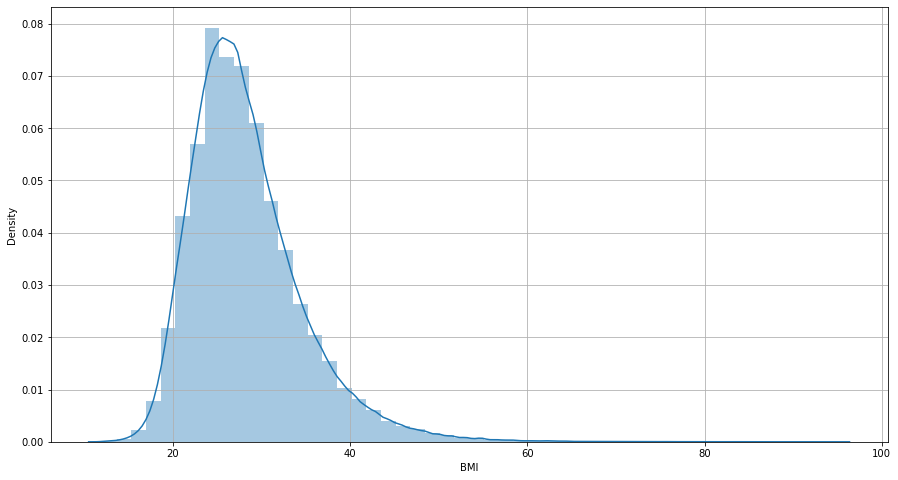

In [103]:
sns.distplot(df.BMI)
plt.grid()

In [104]:
# df.BMI = pd.cut(df['BMI'], 12)

In [105]:
df.BMI.value_counts()

26.63    3762
27.46    2767
27.44    2723
24.41    2696
27.12    2525
         ... 
59.85       1
50.59       1
92.53       1
62.95       1
46.56       1
Name: BMI, Length: 3604, dtype: int64

In [106]:
df.BMI.dtype

dtype('float64')

In [107]:
# df.BMI = df.BMI.astype(str)

In [108]:
# def condition(s):
#     if(s['BMI'] == '(11.937, 18.922]'):
#         return 1   
#     elif(s['BMI'] == '(18.922, 25.825]'):
#         return 2
#     elif(s['BMI'] == '(25.825, 32.728]'):
#         return 3
#     elif(s['BMI'] == '(32.728, 39.63]'):
#         return 4
#     elif(s['BMI'] == '(39.63, 46.532]'):
#         return 5         
#     elif(s['BMI'] == '(46.532, 53.435]'):
#         return 6
#     elif(s['BMI'] == '(53.435, 60.337]'):
#         return 7
#     elif(s['BMI'] == '(60.337, 67.24]'):
#         return 8         
#     elif(s['BMI'] == '(67.24, 74.142]'):
#         return 9          
#     elif(s['BMI'] == '(74.142, 81.045]'):
#         return 10
#     elif(s['BMI'] == '(81.045, 87.947]'):
#         return 11
#     elif(s['BMI'] == '(87.947, 94.85]'):
#         return 12
        
         
# df['BMI'] = df.apply(condition, axis=1)

In [109]:
df.SleepTime.value_counts().sort_index()

1.0       551
2.0       788
3.0      1992
4.0      7750
5.0     19184
6.0     66721
7.0     97751
8.0     97602
9.0     16041
10.0     7796
11.0      415
12.0     2205
13.0       97
14.0      243
15.0      189
16.0      236
17.0       21
18.0      102
19.0        3
20.0       64
21.0        2
22.0        9
23.0        3
24.0       30
Name: SleepTime, dtype: int64

In [110]:
# def condition(s):
#     if(s['SleepTime'] <= 2):
#         return 1   
#     elif(s['SleepTime'] >= 3 and s['SleepTime'] <= 5):
#         return 2
#     elif(s['SleepTime'] >= 6 and s['SleepTime'] <= 8):
#         return 3
#     elif(s['SleepTime'] >= 9 and s['SleepTime'] <= 11):
#         return 4
#     elif(s['SleepTime'] >= 12 and s['SleepTime'] <= 14):
#         return 5
#     elif(s['SleepTime'] >= 15 and s['SleepTime'] <= 17):
#         return 6
#     elif(s['SleepTime'] >= 18 and s['SleepTime'] <= 20):
#         return 7
#     elif(s['SleepTime'] >= 21 and s['SleepTime'] <= 23):
#         return 8
#     elif(s['SleepTime']  > 23):
#         return 9

# df['SleepTime'] = df.apply(condition, axis=1)

In [111]:
# df['SleepTime'].value_counts()

In [112]:
df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,16.60,3.0,30.0,7.0,5,2,3.0,5.0,0,1,0,0,0,0,1,0,1,1
1,20.34,0.0,0.0,12.0,5,0,3.0,7.0,0,0,0,1,0,0,1,0,0,0
2,26.58,20.0,30.0,9.0,5,2,1.0,8.0,0,1,0,0,0,1,1,0,0,1
3,24.21,0.0,0.0,11.0,5,0,2.0,6.0,0,0,0,0,0,0,0,0,1,0
4,23.71,28.0,0.0,4.0,5,0,3.0,8.0,0,0,0,0,1,0,1,0,0,0


### alternate - 'z-score' scaling of continuous variables

In [113]:
# for i in ["BMI", "SleepTime"]:
#     df[i] = ((df[i] - df[i].mean()) / df[i].std())

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   BMI                   319795 non-null  float64
 1   PhysicalHealth        319795 non-null  float64
 2   MentalHealth          319795 non-null  float64
 3   AgeCategory           319795 non-null  float64
 4   Race                  319795 non-null  int32  
 5   Diabetic              319795 non-null  int32  
 6   GenHealth             319795 non-null  float64
 7   SleepTime             319795 non-null  float64
 8   HeartDisease_Yes      319795 non-null  uint8  
 9   Smoking_Yes           319795 non-null  uint8  
 10  AlcoholDrinking_Yes   319795 non-null  uint8  
 11  Stroke_Yes            319795 non-null  uint8  
 12  DiffWalking_Yes       319795 non-null  uint8  
 13  Sex_Male              319795 non-null  uint8  
 14  PhysicalActivity_Yes  319795 non-null  uint8  
 15  

In [115]:
df = df.apply(lambda rec: (rec - min(rec)) / (max(rec) - min(rec)))
df.head()


,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,0.055294,0.100000,1.0,0.583333,1.0,0.666667,0.75,0.173913,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
1,0.100447,0.000000,0.0,1.000000,1.0,0.000000,0.75,0.260870,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.175782,0.666667,1.0,0.750000,1.0,0.666667,0.25,0.304348,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.147169,0.000000,0.0,0.916667,1.0,0.000000,0.50,0.217391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.141132,0.933333,0.0,0.333333,1.0,0.000000,0.75,0.304348,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [89]:
df.head()

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,KidneyDisease_Yes,SkinCancer_Yes,Asthma_Yes
0,1,2,7,6.0,5,2,3.0,2,0,1,0,0,0,0,1,0,1,1
1,2,1,1,11.0,5,0,3.0,3,0,0,0,1,0,0,1,0,0,0
2,3,5,7,8.0,5,2,1.0,3,0,1,0,0,0,1,1,0,0,1
3,2,1,1,10.0,5,0,2.0,3,0,0,0,0,0,0,0,0,1,0
4,2,7,1,3.0,5,0,3.0,3,0,0,0,0,1,0,1,0,0,0


## splitting dependant and independant variables

In [116]:
X = df.drop(['HeartDisease_Yes'], axis =1)
y = df.HeartDisease_Yes

## Downscaling x variables

In [117]:
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
X, y  = undersample.fit_resample(X, y)

In [118]:
y.value_counts()

0.0    282316
1.0     27373
Name: HeartDisease_Yes, dtype: int64

# Decision Tree Model

## Splitting train test set

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify = y) # for split in equal ratio stratify - y

In [120]:
print(y_test.value_counts())
y_train.value_counts()

0.0    84695
1.0     8212
Name: HeartDisease_Yes, dtype: int64


0.0    197621
1.0     19161
Name: HeartDisease_Yes, dtype: int64

## Building Basic Algorithm

In [122]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [123]:
models=[KNeighborsClassifier(),LogisticRegression(),XGBClassifier(),RandomForestClassifier(), GaussianNB()]
scores=dict()

performance_table = ['Model', 'Accuracy', 'Precision', 'Percentage_mislabbled'
                                            'Total_Ones', 'Mislabble_Ones', 'Percent_Mislabbled_Ones', 'Recall_Score', 'F1_Score']

Model = []
Accuracy = []
Precision = []
Percentage_mislabbled = []
Percent_Mislabbled_zeroes =[]
Percent_Mislabbled_Ones =[]
Recall_Score =[]
F1_Score = []


for m in models:
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    percent_mislabbled = (((y_test != y_pred).sum())/X_test.shape[0])*100
    

    y_pred_df = pd.DataFrame(np.array(y_pred), columns= ['ypred'])
    y_test_df = pd.DataFrame(y_test.values, columns = ['y_test'])
    df_test = pd.concat([y_pred_df, y_test_df], axis=1)
    df_test1 = df_test[df_test['y_test'] == 1]
    df_test0 = df_test[df_test['y_test'] == 0]
    percent_how_many_ones_mislabbled = ((df_test1.y_test != df_test1.ypred).sum()) / (len(df_test[df_test['y_test'] == 1])) * 100
    percent_how_many_zeroes_mislabbled = ((df_test0.y_test != df_test0.ypred).sum()) / (len(df_test[df_test['y_test'] == 0])) * 100
    
    

    Model.append(m)    
    Accuracy.append(accuracy_score(y_test,y_pred))
    Precision.append(precision_score(y_test,y_pred))
    Percentage_mislabbled.append(percent_mislabbled)
    Percent_Mislabbled_zeroes.append(percent_how_many_zeroes_mislabbled)    
    Percent_Mislabbled_Ones.append(percent_how_many_ones_mislabbled)
    Recall_Score.append(recall_score(y_test,y_pred))
    F1_Score.append(f1_score(y_test,y_pred))

performance_table = {'Model':Model , 'Accuracy':Accuracy, 'Precision': Precision, 'Percentage_mislabbled':Percentage_mislabbled, 'Percent_Mislabbled_zeroes': Percent_Mislabbled_zeroes,
                                            'Percent_Mislabbled_Ones': Percent_Mislabbled_Ones , 'Recall_Score': Recall_Score, 
                                            'F1_Score' :F1_Score}

performance_table = pd.DataFrame(performance_table)
performance_table

,Model,Accuracy,Precision,Percentage_mislabbled,Percent_Mislabbled_zeroes,Percent_Mislabbled_Ones,Recall_Score,F1_Score
0,KNeighborsClassifier(),0.907951,0.452752,9.204904,2.324813,80.163176,0.198368,0.275868
1,LogisticRegression(),0.914904,0.574853,8.509585,1.026035,85.691671,0.143083,0.229134
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.914786,0.570811,8.521425,1.055552,85.521189,0.144788,0.230986
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.912203,0.509408,8.779747,1.693134,81.867998,0.181320,0.267445
4,GaussianNB(),0.848698,0.290336,15.130184,11.679556,50.718461,0.492815,0.365401


In [124]:
rft = RandomForestClassifier()
rft.fit(X_train,y_train)
pd.DataFrame({"Featrues" : X_train.columns, "score":rft.feature_importances_}).sort_values("score", ascending=False)

,Featrues,score
0,BMI,0.324466
3,AgeCategory,0.108947
7,SleepTime,0.104992
1,PhysicalHealth,0.075818
2,MentalHealth,0.066680
6,GenHealth,0.066518
4,Race,0.036691
5,Diabetic,0.030308
10,Stroke_Yes,0.029040
13,PhysicalActivity_Yes,0.025873
